In [64]:
import numpy as np
import math
import sys

In [65]:

def kernel(x,y):
    x = np.array(x)
    y = np.array(y)
    return np.exp((-(x-y)**2)/2)

In [66]:
def computeMMD(x, y, N,i,j):
    # Convert x and y to numpy arrays
    
    
    # Compute kernel matrices using broadcasting
    Kxx = kernel(x[:, None], x[None, :])  # Kernel matrix for x with itself
    Kyy = kernel(y[:, None], y[None, :])  # Kernel matrix for y with itself
    Kxy = kernel(x[:, None], y[None, :])  # Kernel matrix for x with y

    # Calculate the MMD using vectorized operations
    MMD_squared = (np.sum(Kxx) + np.sum(Kyy) - 2 * np.sum(Kxy)) / (N**2)
    #print(i,j,MMD_squared)
    
    return np.sqrt(MMD_squared)


In [67]:
#lst = [[0,10,6,5,9],[10,0,8,7,2],[6,8,0,1,4],[5,7,1,0,3],[9,2,4,3,0]]
import random
M = 25      # total number of sequences
Mk = 5      # number of sequences per cluster
K = 5       # number of clusters
Nvec= [30,35,40,45,50,55,60,65,70]     # number of elements in 1 sequence
clusters = [[i] for i in range(M)]
# means = [0.4,0.55,0.7,0.85,1,1.15,1.3,1.45,1.6, 1.85,2,2.15]
means = [i for i in range(K) for j in range(Mk)]
# correct = [[0,1,2,3,4,5,6,7,8],[9,10,11]]
correct = [[(Mk*i)+j for j in range(Mk)]for i in range(K)]
print(means)
print(correct)
# with open('slink-fss-mmdnew100.txt', 'a') as f:
#     print(correct,means, file = f)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]
[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24]]


In [68]:
Pe = np.zeros(len(Nvec))  # Initializing Pe array with zeros
lnPe = np.zeros(len(Nvec))  # Initializing lnPe array with zeros

for ii in range(len(Nvec)):  # Looping through each element in Nvec
    
    N = Nvec[ii]  # Setting N to the current element in Nvec
    total = 0  # Initializing total to 0
    error = 0  # Initializing error to 0
    while error < 200:  # Loop until error is less than 100

        clusters = [[i] for i in range(M)]  # Initializing clusters
        total += 1  # Incrementing total by 1
        lst = [[] for i in range(M)]  # Initializing lst
        # print("the length of the list is",len(lst))
        a = [np.random.normal(means[i], 1, (1, N)) for i in range(M)]  # Generating random samples
        y = np.asarray(a)  # Converting a to numpy array
        y = np.vstack(y)  # Stacking arrays in sequence vertically
        lst = [[computeMMD(y[i, :], y[j, :], N,i,j) for j in range(i + 1)] for i in range(M)]  # Computing MMD
        # print('list after MMD computation:',lst)

        for i in range(M):  # Looping through each element in M
            for j in range(M):  # Looping through each element in M
                if i < j:  # If i is less than j
                    lst[i].append(lst[j][i])  # Append lst[j][i] to lst[i]
        # print('list after manipulation',lst)

        while len(clusters) > K:  # Loop until the length of clusters is greater than K

####################### FIND MINIMUM DISTANCE FOR COMPLETE LINKAGE ####
            mi = 100
            for i in range(len(lst)):
                for j in range(i+1):
                    if i != j:
                        if lst[i][j] < mi:
                            mi = lst[i][j]
                            a,b = [i,j]
            # max_dist = -sys.float_info.max  # Initializing max_dist to the smallest possible float value
            # for i in range(len(lst)):  # Looping through each element in lst
            #     for j in range(i + 1):  # Looping through each element in lst up to i
            #         if i != j:  
            #             if lst[i][j] > max_dist:  # If lst[i][j] is greater than max_dist
            #                 max_dist = lst[i][j]  # Set max_dist to lst[i][j]
            #                 a, b = i, j  # Set a and b to i and j respectively
            # print('min distance:',mi,a,b)

            clusters[b].extend(clusters[a])  # Extend clusters[b] with clusters[a]
            del clusters[a]  # Delete clusters[a]
            # print("the final cluster is :",clusters)



            
            #### MERGE ROWS ####
            for i in range(len(lst[b])):  # Looping through each element in lst[b]
                if max(lst[a][i], lst[b][i]) != 0:  # If the maximum of lst[a][i] and lst[b][i] is not 0
                    lst[b][i] = max(lst[a][i], lst[b][i])  # Set lst[b][i] to the maximum of lst[a][i] and lst[b][i]
            del lst[a]  




            ############################ UPDATE ROWS ##########################
            for i in range(len(lst)):  # Looping through each element in lst
                if i != b:
                    lst[i][b] = max(lst[i][a], lst[i][b]) 
                del lst[i][a]  # Delete lst[i][a]

        clusters.sort()  # Sort clusters
        C_sort = [] 
        for x in clusters:  # Looping through each element in clusters
            x.sort()  # Sort x
            C_sort.append(x)  

        if correct != C_sort: 
            error = error + 1 

        # print(error, total) 

    Pe[ii] = error / total 
    lnPe[ii] = math.log(Pe[ii])  
    print(total, Pe[ii], lnPe[ii])  

495 0.40404040404040403 -0.9062403960206536
694 0.2881844380403458 -1.2441545939587677
1045 0.19138755980861244 -1.6534547978508747
1460 0.136986301369863 -1.9878743481543455
2403 0.08322929671244278 -2.4861558691884325
3750 0.05333333333333334 -2.9311937524164198
5067 0.03947108742845865 -3.232186838927873
8079 0.024755539051862854 -3.698706014931672
11438 0.017485574401119076 -4.046379057927225


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 440, 460, 480, 500, 520]


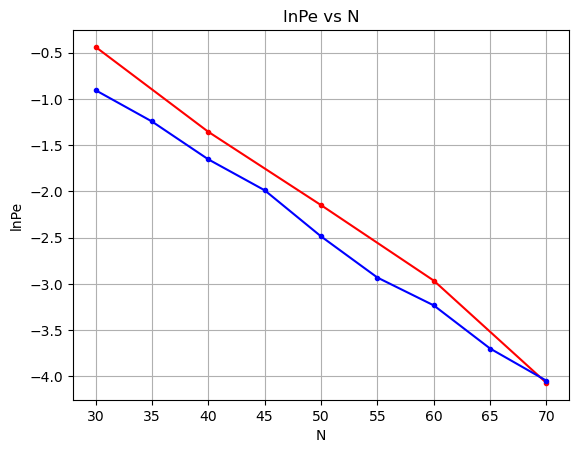

In [71]:
import matplotlib.pyplot as plt
Nvec_C = [30, 35, 40, 45, 50, 55, 60, 65, 70]
lnPe_C = [-0.9062404 , -1.24415459 ,-1.6534548 , -1.98787435 ,-2.48615587, -2.93119375,-3.23218684 ,-3.69870601, -4.04637906]
Nvec_S = [30,40,50,60,70]
lnPe_S = [-0.4382549309311553, -1.3558351536351823, -2.1482677326096886, -2.96424160646262, -4.070222620101691]


print(lnPe)
print(Nvec)
plt.plot(Nvec_S, lnPe_S, '-r.')
plt.plot(Nvec_C, lnPe_C, '-b.')
plt.xlabel('N')
plt.ylabel('lnPe')
plt.title('lnPe vs N')
plt.grid(1)
plt.show()

In [70]:
Nvec = [20,60,100,140,180,220,260,300,340,380,420,440,460,480,500,520]
Pe = np.zeros(len(Nvec))
lnPe=np.zeros(len(Nvec))

for ii in range(len(Nvec)):
    N = Nvec[ii]
    total = 0
    error = 0
    while total < 3000:

        clusters = [[i] for i in range(M)]
        total += 1
        lst = [[] for i in range(M)]
        # a = [np.random.normal(means[i],1,(1,N)) for i in range(M)]
        # y = np.asarray(a)
        # y = np.vstack(y)
        p = 0.7
        k = np.random.binomial(1,p,N)
        # print("the value of K is :",k)
        sample_1 = ((1 - k) ) * np.random.normal(0, 1, (1,N)) + (k) * np.random.normal(0.5, 1, (1,N))
        k = np.random.binomial(1,p,N)
        sample_2 = ((1 - k)) * np.random.normal(0.5, 1, (1,N)) + (k ) * np.random.normal(1, 1, (1,N))
        k = np.random.binomial(1,p,N)
        sample_3 = ((1 - k)) * np.random.normal(2, 1, (1,N)) + (k ) * np.random.normal(2.5, 1, (1,N)) - 0.8
        k = np.random.binomial(1,p,N)
        sample_4 = ((1 - k) ) * np.random.normal(2.5, 1, (1,N)) + (k) * np.random.normal(3, 1, (1,N)) -0.8
        y = np.vstack((sample_1, sample_2, sample_3, sample_4))
        lst = [[computeMMD(y[i,:],y[j,:],N,i,j) for j in range(i+1)] for i in range(M)]

        for i in range(M):
            for j in range(M):
                if i<j:
                    lst[i].append(lst[j][i])
        #print(lst)
        n = 0
        while len(clusters)>K:

            ####    FIND MINIMUM    ####
        
            #mi = sys.float_info.max
            mi = 100
            for i in range(len(lst)):
                for j in range(i+1):
                    if i != j:
                        if lst[i][j] < mi:
                            mi = lst[i][j]
                            a,b = [i,j]
            #print(a,b)
            clusters[b].extend(clusters[a])
            del clusters[a]
            #print(clusters)

            ####    MERGE ROWS  ####

            for i in range(len(lst[b])):        #merge rows 'a' and 'b'
                if min(lst[a][i],lst[b][i]) != 0:
                    lst[b][i] = min(lst[a][i],lst[b][i])
            del lst[a]

            ####    UPDATE ROWS     ####

            for i in range(len(lst)):       #update all other rows
                if i!=b:
                    lst[i][b] = min(lst[i][a],lst[i][b])
                del lst[i][a]   #new statement

            #print('dist matrix', lst)
            #print('dist matrix 2', dist)
            # print('clusters',clusters)
            n = n+1

        clusters.sort()
        C_sort = []
        for x in clusters:
            x.sort()
            C_sort.append(x)

        #print(C_sort)
        #print(centers)

        if correct != C_sort:
            error = error + 1
            #print('L')
        #else:
            #print('W')
        # print(error,total)


    Pe[ii] = error/total
    lnPe[ii] = math.log(Pe[ii])
    print(total,Pe[ii],lnPe[ii])

    # with open('slink-fss-mmdnew100.txt', 'a') as f:
    #     print(N,lnPe[ii], file = f)

IndexError: index 4 is out of bounds for axis 0 with size 4